In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


In [ ]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'alpha']+ \
    [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [ ]:
network_model = SEIRNetworkModel(10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha_arr = np.arange(0.2, 1, 0.01) # fraction of initial non-immune array
beta_arr = np.arange(0.1, 1, 0.01) # transmission rate array

print('Dataset size:', len(alpha_arr)*len(beta_arr))

for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha))
        sample = [beta, gamma, delta, init_inf_frac, alpha] + res.daily_incidence
        dataset.loc[len(dataset)] = sample

Dataset size: 7200


100%|██████████| 90/90 [6:10:52<00:00, 247.24s/it]  


In [23]:
dataset.to_csv('../data/network_model_dataset_big.csv')

In [24]:
dataset

,beta,gamma,delta,init_inf_frac,init_rec_frac,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
0,0.10,0.3,0.2,0.0001,0.29,0.0,8.0,16.0,26.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,0.3,0.2,0.0001,0.29,0.0,9.0,15.0,14.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,0.3,0.2,0.0001,0.29,0.0,23.0,29.0,36.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,0.3,0.2,0.0001,0.29,0.0,15.0,35.0,37.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.10,0.3,0.2,0.0001,0.29,0.0,14.0,36.0,66.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,0.99,0.3,0.2,0.0001,0.29,0.0,490.0,1382.0,2765.0,5157.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7608,0.99,0.3,0.2,0.0001,0.29,0.0,566.0,1662.0,3384.0,6131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.99,0.3,0.2,0.0001,0.29,0.0,565.0,1801.0,3873.0,7100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.99,0.3,0.2,0.0001,0.29,0.0,532.0,1810.0,4093.0,7781.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


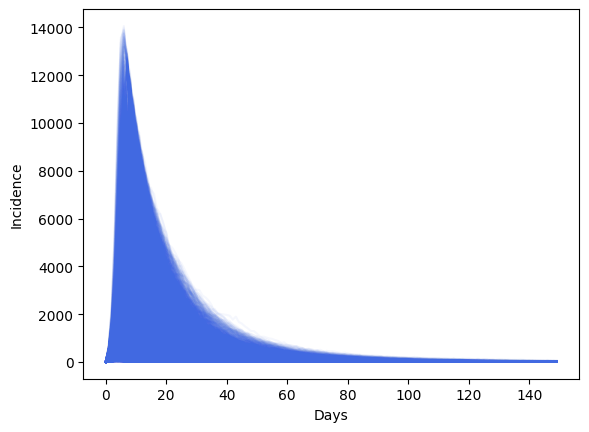

In [26]:
for i in range(len(dataset)):
    plt.plot(dataset.values[i][5:], color='RoyalBlue', alpha=0.05)

plt.xlabel('Days')
plt.ylabel('Incidence')
plt.savefig('../figures/train_curves.png', dpi=600, bbox_inches='tight')

R_0 =  1.0


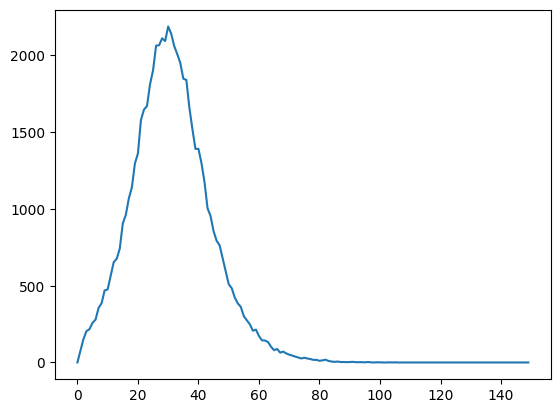

In [34]:
beta = 0.2 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected
print('R_0 = ', beta/delta)

res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
plt.plot(res.daily_incidence)